In [40]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [41]:
df = pd.read_csv("homeprices (1).csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [53]:
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace = True)

In [55]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [56]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression()

In [58]:
reg.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [59]:
reg.intercept_

231586.00639409182

In [61]:
reg.predict([[3000,4,15]])

C:\New folder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([601483.40843428])

In [62]:
112.06244194*3000+23388.88007794*4-15*3231.71790863+221323.0018654043

602590.0793677142

In [63]:
from sklearn.metrics import r2_score

# Make predictions on the training data
y_pred = reg.predict(df[['area', 'bedrooms', 'age']])

# Calculate R² Score
r2 = r2_score(df['price'], y_pred)
print("R² Score:", r2)


R² Score: 0.9540926625396439


In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale features
scaled_features = scaler.fit_transform(df[['area', 'bedrooms', 'age']])

# Train model again
reg.fit(scaled_features, df['price'])

# Predict after scaling
scaled_input = scaler.transform([[3000, 4, 15]])
new_prediction = reg.predict(scaled_input)

print("New Predicted Price:", new_prediction[0])


New Predicted Price: 601483.4084342818


C:\New folder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# This helps us see which feature has the most impact on price.

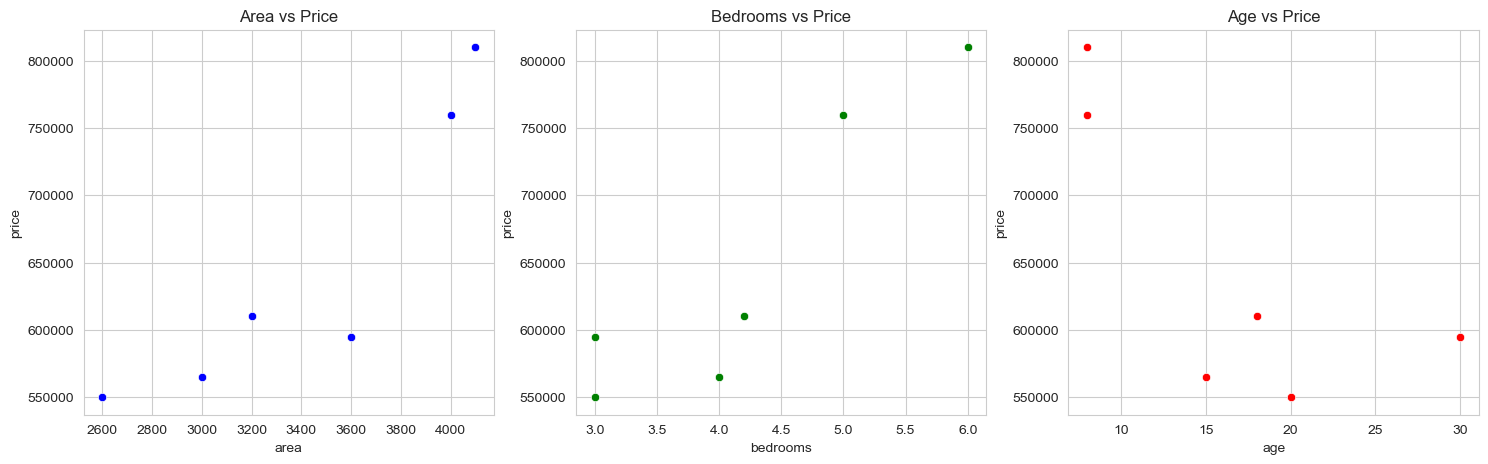

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create subplots for Area, Bedrooms, and Age vs. Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter Plot for Area vs Price
sns.scatterplot(x=df['area'], y=df['price'], ax=axes[0], color='blue')
axes[0].set_title("Area vs Price")

# Scatter Plot for Bedrooms vs Price
sns.scatterplot(x=df['bedrooms'], y=df['price'], ax=axes[1], color='green')
axes[1].set_title("Bedrooms vs Price")

# Scatter Plot for Age vs Price
sns.scatterplot(x=df['age'], y=df['price'], ax=axes[2], color='red')
axes[2].set_title("Age vs Price")

plt.show()


In [ ]:
# Since we can't visualize a 4D plot, we pick two important features (area & age).

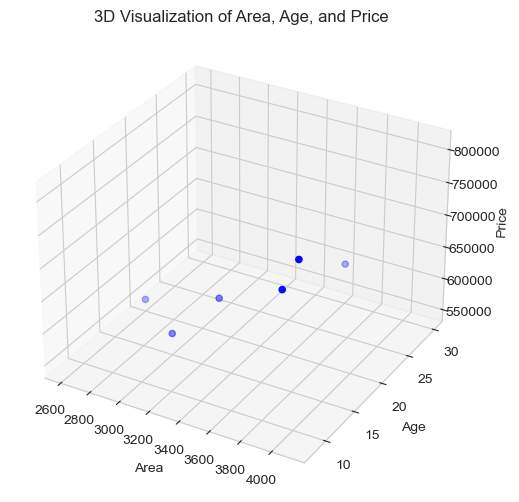

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['area'], df['age'], df['price'], c='blue', marker='o')

# Labels
ax.set_xlabel('Area')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title("3D Visualization of Area, Age, and Price")

plt.show()


In [ ]:
# Let's see how well our model predicts price based on area.

C:\New folder\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


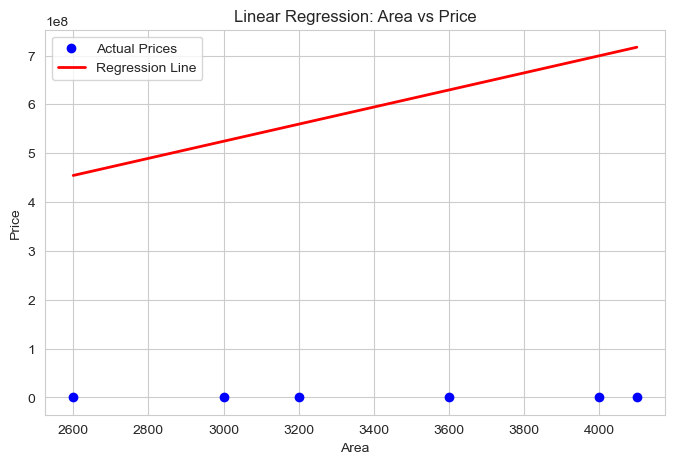

In [67]:
import numpy as np

# Predict price for a range of areas
area_range = np.linspace(df['area'].min(), df['area'].max(), 100)
predicted_prices = reg.predict(pd.DataFrame({'area': area_range, 'bedrooms': df['bedrooms'].mean(), 'age': df['age'].mean()}))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['area'], df['price'], color='blue', label="Actual Prices")
plt.plot(area_range, predicted_prices, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: Area vs Price")
plt.legend()
plt.show()


In [73]:
pip install word2number


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5567 sha256=414a02b58279c06fed736d70e4baa9e8f19ecaf9e6b7b82a15ceaa3292295fb0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number


In [74]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [75]:
df = pd.read_csv('hiring.csv')

In [76]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [77]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [78]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [80]:
pip install math

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [83]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [85]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

In [86]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [87]:
reg = linear_model.LinearRegression()

In [89]:
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [92]:
reg.predict([[2, 8, 7]])

C:\New folder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53574.92984302])

In [93]:
import pickle

In [95]:
with open('model_pickle.py', 'wb') as f:
    pickle.dump(reg,f)

In [96]:
with open('model_pickle.py', 'rb') as f:
    mp = pickle.load(f)

In [97]:
mp.predict([[2,8,7]])

C:\New folder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53574.92984302])

In [99]:
import joblib


In [101]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [102]:
mj = joblib.load('model_joblib')

In [104]:
mj.predict([[2,8,7]])

C:\New folder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53574.92984302])

In [105]:
mj.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [106]:
mj.intercept_

17237.330313727172